In [1]:

from collections import defaultdict
from dimod import SimulatedAnnealingSampler
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivatives
def f(x):
    return np.sin(2*np.pi*x)

def f_prime_norm(x):
    return np.cos(2*np.pi*x)

def f_second_norm(x):
    return -np.sin(2*np.pi*x)

def comp_radius(x, min, max):
    k1 = min/(max-min)
    k2 = max*min/(max-min) 
    area = k2/(f_second_norm(x)**2+k1)
    return area


# def f_second(x):
#     return -4 * (np.pi**2) * np.sin(2 * np.pi * x) -64 * (np.pi**2) *np.cos(8*np.pi*x)

# def f_second_norm(x):
#     res = f_second(x)
#     return res/np.max(abs(res))

# Initial uniform mesh
x_initial = np.linspace(-1, 1, 21)
y_initial = f(x_initial)
# x_mid = np.zeros(9)
# for i in range(9):
#     x_mid[i] = (x_initial[i]+x_initial[i+1])/2
# Define mesh points
num_points = 41
x_tot = np.linspace(-1, 1, num_points)  # Full grid

# Parameters
F = 28  # Max number of nodes
beta = 1  # Enforcing parameter for sparsity
alpha = 2  # Interference enforcing parameter
area_weight = 5  # Area enforcement
min_radius = 1 / 50
max_radius = 1 / 3

# Initialize QUBO matrix
Q = defaultdict(int)

# Compute radii for all points
radii = np.array([comp_radius(x, min_radius, max_radius) for x in x_tot])

# Define the QUBO matrix more efficiently
for i in range(num_points):
    area = radii[i] ** 2 * np.pi
    Q[(i, i)] = -area_weight * area + beta * (1 - 2 * F)

    for j in range(i + 1, num_points):  # Avoid duplicate calculations
        interference = max(0, radii[i] + radii[j] - abs(x_tot[i] - x_tot[j]))
        Q[(i, j)] = 2 * beta + alpha * interference


In [2]:

# Define the sampler that will be used to run the problem
#sampler = EmbeddingComposite(DWaveSampler())
# Instantiate the sampler
sampler = SimulatedAnnealingSampler()

# Run the problem on the sampler and print the results
sampleset = sampler.sample_qubo(Q,
                                 num_reads = 100)
#print(sampleset) #prints energy, number of occurencies and 
result = sampleset.first.sample #lowest energy sample

#print(first)
#for k in range(9):
    #print(result[k])

x_adapt = [x_tot[k] for k in range(len(x_tot)) if result[k] == 1]

print(x_initial)
print(x_adapt)


[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[np.float64(-1.0), np.float64(-0.8), np.float64(-0.75), np.float64(-0.7), np.float64(-0.6499999999999999), np.float64(-0.6), np.float64(-0.55), np.float64(-0.3999999999999999), np.float64(-0.35), np.float64(-0.29999999999999993), np.float64(-0.25), np.float64(-0.19999999999999996), np.float64(-0.1499999999999999), np.float64(-0.09999999999999998), np.float64(0.050000000000000044), np.float64(0.10000000000000009), np.float64(0.15000000000000013), np.float64(0.20000000000000018), np.float64(0.25), np.float64(0.30000000000000004), np.float64(0.3500000000000001), np.float64(0.40000000000000013), np.float64(0.55), np.float64(0.6000000000000001), np.float64(0.6500000000000001), np.float64(0.7000000000000002), np.float64(0.75), np.float64(1.0)]


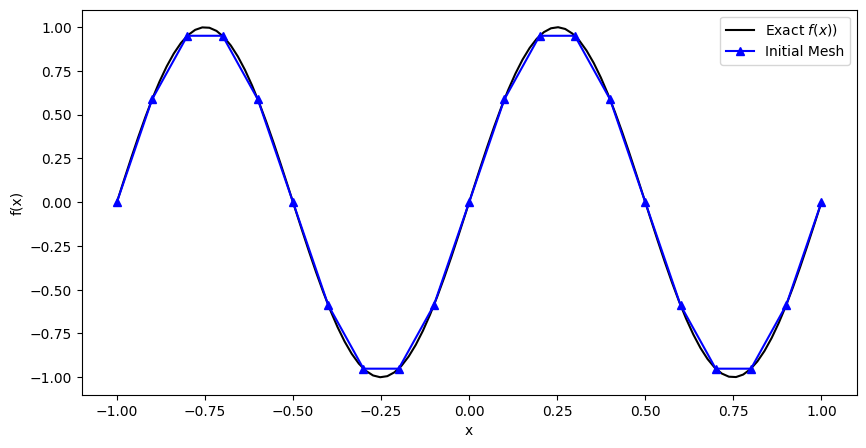

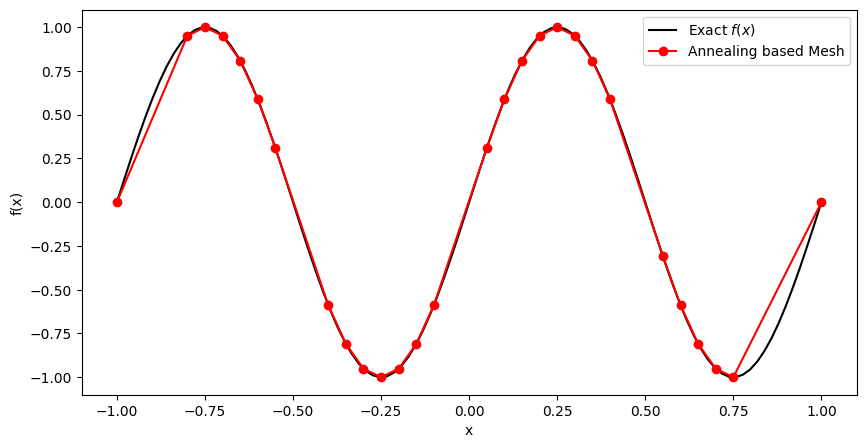

In [3]:

y_adaptive = f(np.array(x_adapt))
# Plotting the initial and adapted meshes
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-1, 1, 100), f(np.linspace(-1, 1, 100)), 'k-', label="Exact $f(x))$")
plt.plot(x_initial, y_initial, 'b^-', label="Initial Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-1, 1, 100), f(np.linspace(-1, 1, 100)), 'k-', label="Exact $f(x)$")
plt.plot(x_adapt, y_adaptive, 'ro-', label="Annealing based Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

